In [7]:
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8]

# Analiza dynamiki fiksacji
## Analiza A - dynamika w funkcji wybranej odpowiedzi

In [3]:
Lmin = 10
Lmax = 118

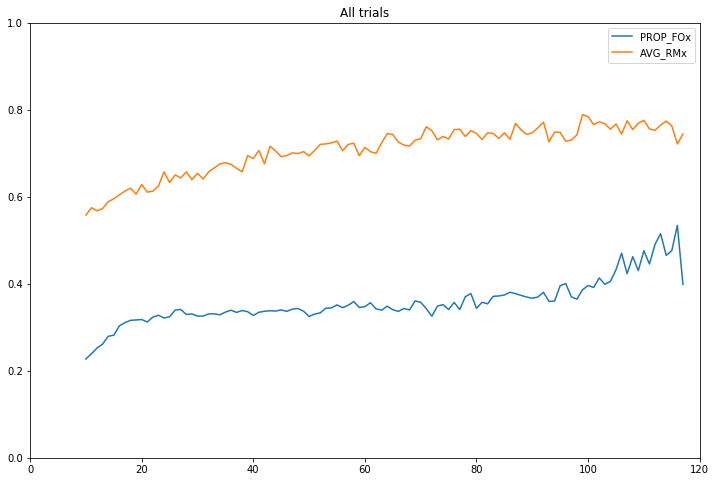

In [9]:
### Wszystkie triale
full = pd.read_csv(join('results', 'dynamics_full.csv'))
full[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'All trials',xlim=[0, 120], ylim=[0,1])

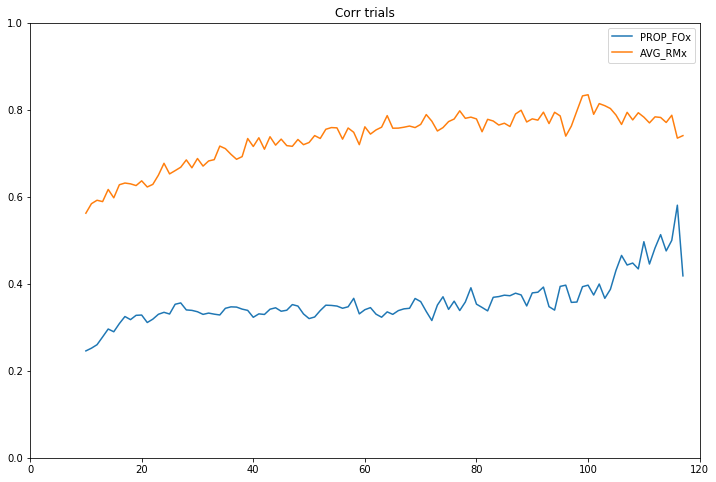

In [10]:
corr = pd.read_csv(join('results', 'dynamics_corr.csv'))
corr[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Corr trials', xlim=[0, 120], ylim=[0,1])

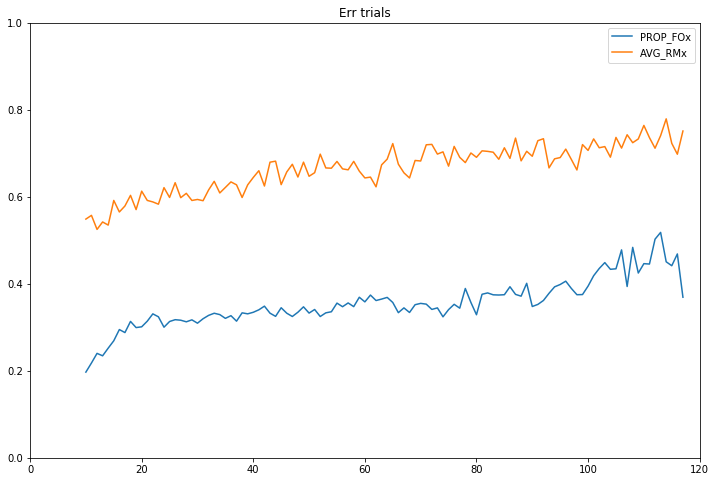

In [4]:
err = pd.read_csv(join('results', 'dynamics_err.csv'))
err[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Err trials', xlim=[0, 120], ylim=[0,1])

## Analiza B - czy czas rozwiązywania triala wpływa jakoś na dynamikę?

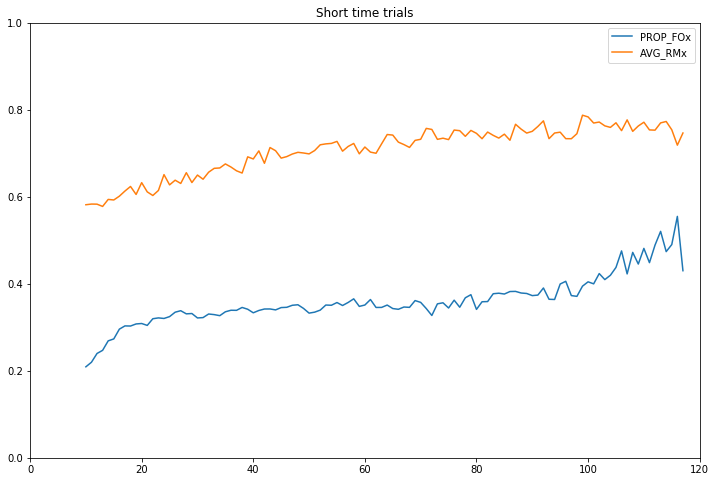

In [27]:
short_time = pd.read_csv(join('results', 'dynamics_time_short.csv'))
short_time[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Short time trials', xlim=[0, 120], ylim=[0,1])

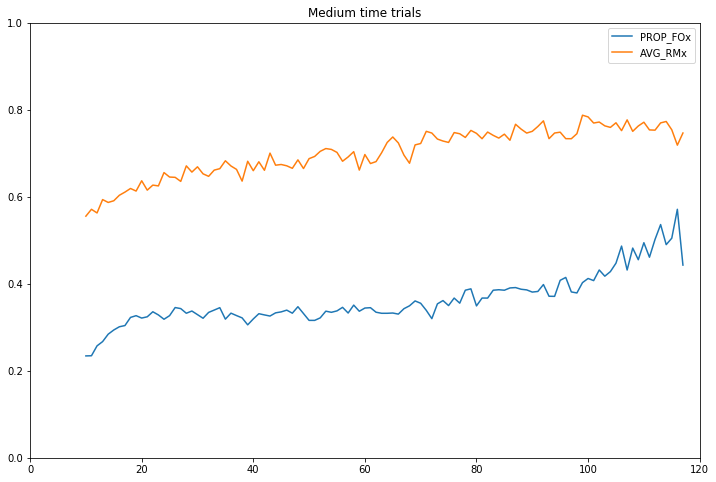

In [28]:
med_time = pd.read_csv(join('results', 'dynamics_time_med.csv'))
med_time[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Medium time trials', xlim=[0, 120], ylim=[0,1])

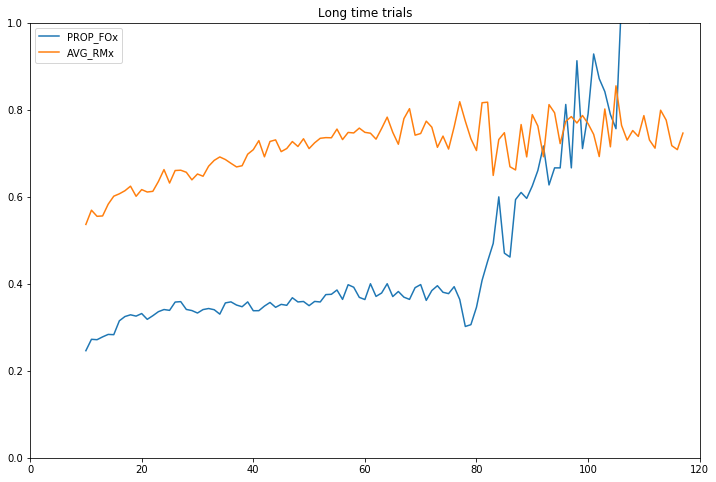

In [29]:
long_time = pd.read_csv(join('results', 'dynamics_time_long.csv'))
long_time[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Long time trials', xlim=[0, 120], ylim=[0,1])

## Analiza C - EASY, MEDIUM, HARD

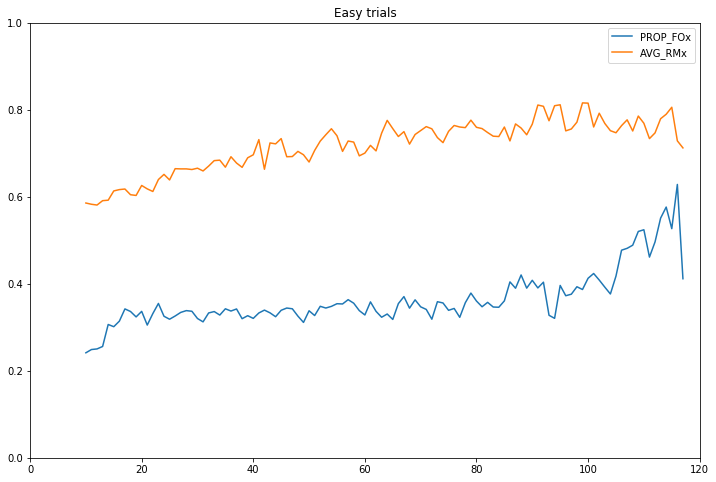

In [49]:
easy = pd.read_csv(join('results', 'dynamics_lev_easy.csv'))
easy[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Easy trials', xlim=[0, 120], ylim=[0,1])

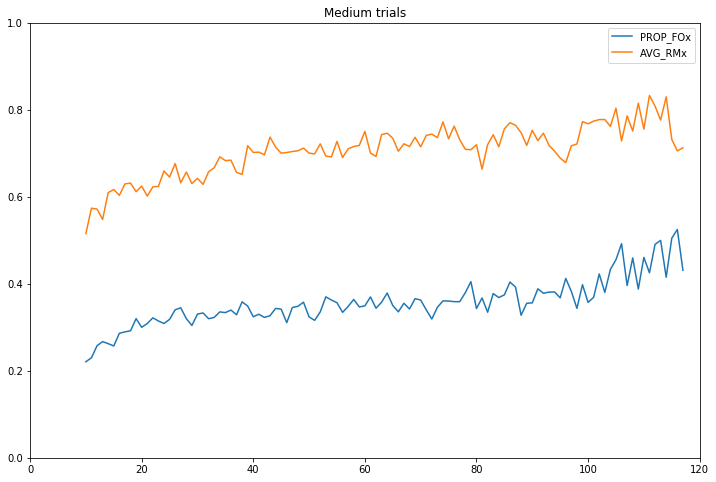

In [50]:
med_lev = pd.read_csv(join('results', 'dynamics_lev_med.csv'))
med_lev[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Medium trials', xlim=[0, 120], ylim=[0,1])

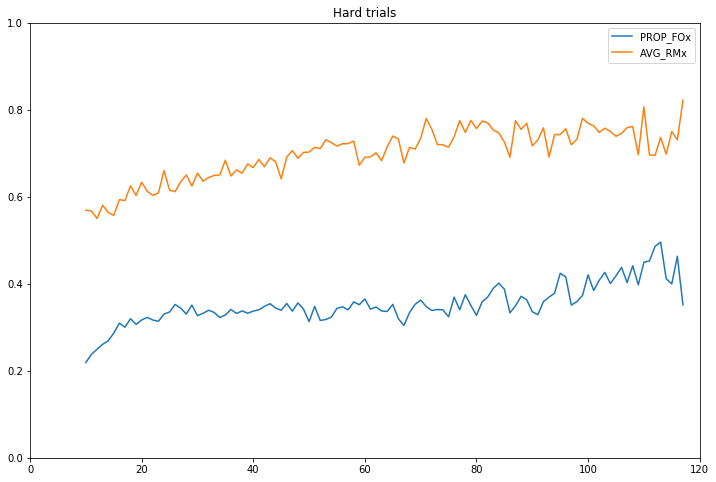

In [51]:
hard_lev = pd.read_csv(join('results', 'dynamics_lev_hard.csv'))
hard_lev[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Hard trials', xlim=[0, 120], ylim=[0,1])

## Analiza D - dynamika w funkcji WMC (low, medium, high)

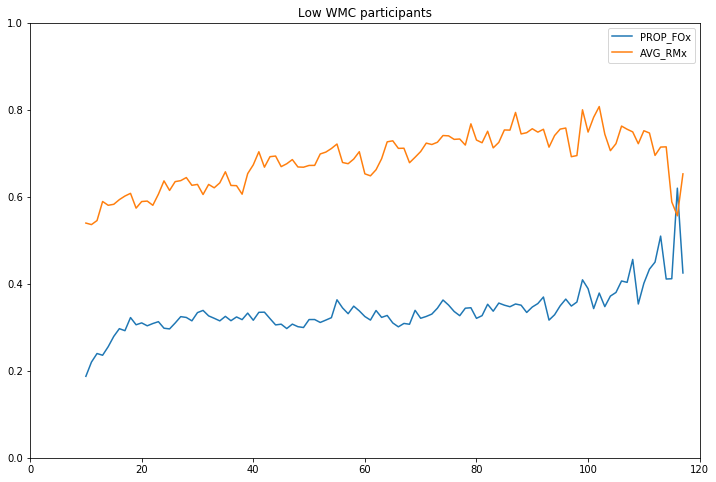

In [32]:
wmc_low = pd.read_csv(join('results', 'dynamics_wmc_low.csv'))
wmc_low[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Low WMC participants', xlim=[0, 120], ylim=[0,1])

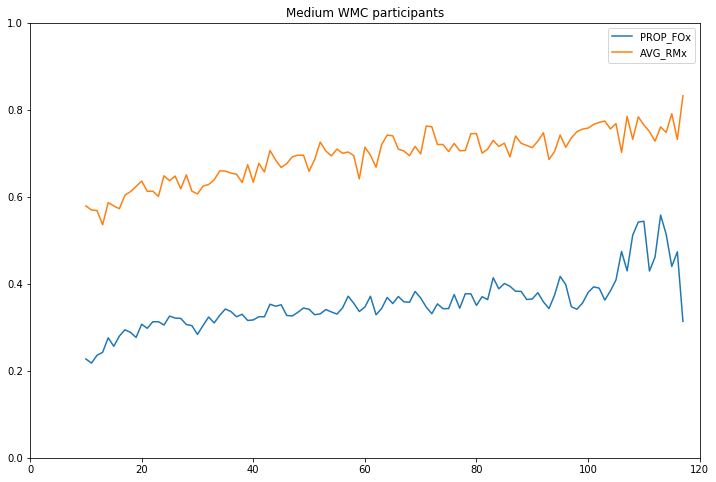

In [33]:
wmc_med = pd.read_csv(join('results', 'dynamics_wmc_med.csv'))
wmc_med[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'Medium WMC participants', xlim=[0, 120], ylim=[0,1])

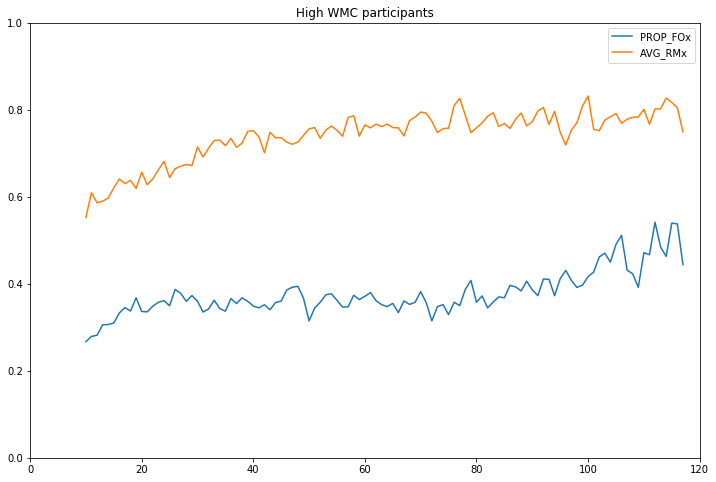

In [34]:
wmc_high = pd.read_csv(join('results', 'dynamics_wmc_high.csv'))
wmc_high[Lmin:Lmax][['PROP_FOx', 'AVG_RMx']].plot(title = 'High WMC participants', xlim=[0, 120], ylim=[0,1])

# Predziały ufności
1.96 razy odchylenie standardowe danej miary (tzn. albo PROP_FO albo AVG_RM) podzielone przez pierwiastek kwadratowy z liczby triali dla tej sekundy (czyli Kx): 1.96*(SDx/SQRT(Kx)) [inaczej 1.96 razy błąd standardowy miary w danej sekundzie].

# WMC 

## PROP_FOx

In [37]:
def add_CI_PROP(data):
    data["PROP_FOx_low_CI"] = data['PROP_FOx'] -  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
    data["PROP_FOx_high_CI"] = data["PROP_FOx"] +  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))

add_CI_PROP(wmc_low)
add_CI_PROP(wmc_med)
add_CI_PROP(wmc_high)

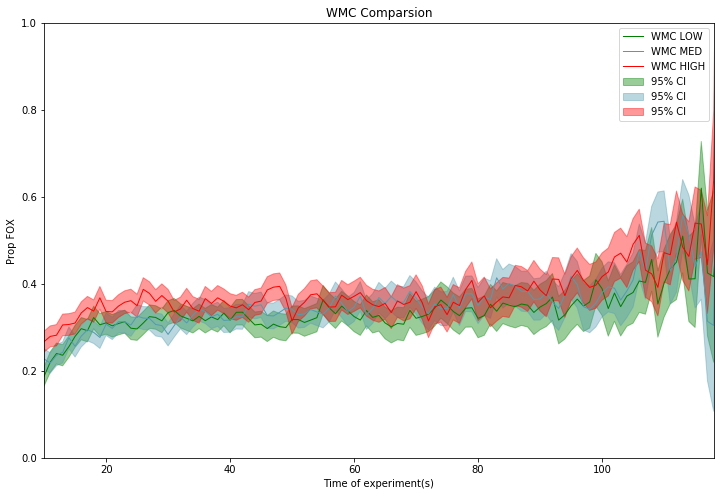

In [40]:
# Define a function for the line plot with intervals
_, ax = plt.subplots()

# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax.plot(wmc_low['PROP_FOx'].index.tolist(),
        wmc_low['PROP_FOx'].tolist(), 
        lw = 1,
        color = 'green',
        alpha = 1,
        label = 'WMC LOW')
# Shade the confidence interval
ax.fill_between(wmc_low['PROP_FOx'].index.tolist(),
                wmc_low["PROP_FOx_low_CI"],
                wmc_low["PROP_FOx_high_CI"], 
                color = 'green',
                alpha = 0.4,
                label = '95% CI')

ax.plot(wmc_med['PROP_FOx'].index.tolist(),
        wmc_med['PROP_FOx'].tolist(), 
        lw = 1,
        color = '#539caf',
        alpha = 1,
        label = 'WMC MED')
# Shade the confidence interval
ax.fill_between(wmc_med['PROP_FOx'].index.tolist(),
                wmc_med["PROP_FOx_low_CI"],
                wmc_med["PROP_FOx_high_CI"], 
                color = '#539caf',
                alpha = 0.4,
                label = '95% CI')

ax.plot(wmc_high['PROP_FOx'].index.tolist(),
        wmc_high['PROP_FOx'].tolist(), 
        lw = 1,
        color = 'red',
        alpha = 1,
        label = 'WMC HIGH')
# Shade the confidence interval
ax.fill_between(wmc_high['PROP_FOx'].index.tolist(),
                wmc_high["PROP_FOx_low_CI"],
                wmc_high["PROP_FOx_high_CI"], 
                color = 'red',
                alpha = 0.4,
                label = '95% CI')

# Label the axes and provide a title
ax.set_title('WMC Comparsion')
ax.set_xlabel('Time of experiment(s)')
ax.set_ylabel('Prop FOX')
ax.set_xlim([Lmin,Lmax])
ax.set_ylim([0,1])

    # Display legend
ax.legend(loc = 'best')



In [42]:
wmc_low.head()

,Unnamed: 0,Kx,FOx,FOx_STD,RMx,RMx_STD,RMk,PROP_FOx,AVG_RMx,PROP_FOx_low_CI,PROP_FOx_high_CI
0,0,1429,94,0.290143,48.184127,0.400715,94,0.065780,0.512597,0.050737,0.080824
1,1,1429,81,0.263168,43.537460,0.400448,81,0.056683,0.537500,0.043038,0.070328
2,2,1429,81,0.261616,41.382857,0.392323,81,0.056683,0.510899,0.043118,0.070248
3,3,1429,84,0.266806,40.489206,0.396520,84,0.058782,0.482014,0.044949,0.072616
4,4,1428,112,0.302287,58.576825,0.395706,112,0.078431,0.523007,0.062753,0.094110


In [47]:
def add_CI_PROP(data):
    data["RM_low_CI"] = data['AVG_RMx'] -  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))
    data["RM_high_CI"] = data['AVG_RMx'] +  (1.96 * (data.RMx_STD / np.sqrt(data.RMk)))

add_CI_PROP(wmc_low)
add_CI_PROP(wmc_med)
add_CI_PROP(wmc_high)

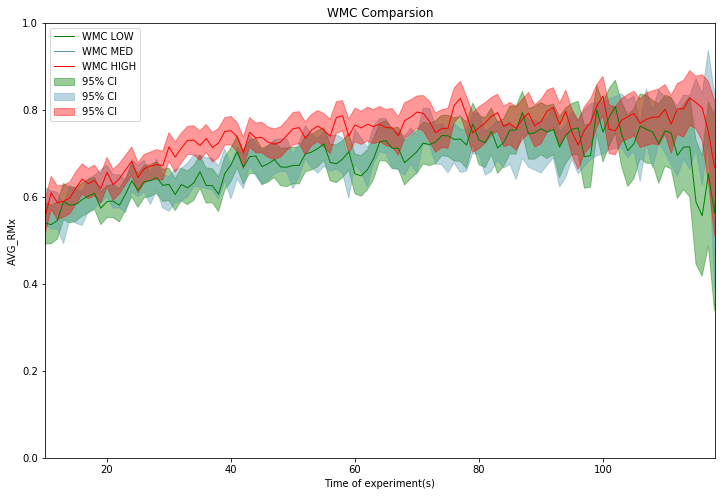

In [48]:
# Define a function for the line plot with intervals
_, ax = plt.subplots()

# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax.plot(wmc_low['AVG_RMx'].index.tolist(),
        wmc_low['AVG_RMx'].tolist(), 
        lw = 1,
        color = 'green',
        alpha = 1,
        label = 'WMC LOW')
# Shade the confidence interval
ax.fill_between(wmc_low['AVG_RMx'].index.tolist(),
                wmc_low["RM_low_CI"],
                wmc_low["RM_high_CI"], 
                color = 'green',
                alpha = 0.4,
                label = '95% CI')

ax.plot(wmc_med['RMx'].index.tolist(),
        wmc_med['RMx'].tolist(), 
        lw = 1,
        color = '#539caf',
        alpha = 1,
        label = 'WMC MED')
# Shade the confidence interval
ax.fill_between(wmc_med["AVG_RMx"].index.tolist(),
                wmc_med["RM_low_CI"],
                wmc_med["RM_high_CI"], 
                color = '#539caf',
                alpha = 0.4,
                label = '95% CI')

ax.plot(wmc_high['AVG_RMx'].index.tolist(),
        wmc_high['AVG_RMx'].tolist(), 
        lw = 1,
        color = 'red',
        alpha = 1,
        label = 'WMC HIGH')
# Shade the confidence interval
ax.fill_between(wmc_high['AVG_RMx'].index.tolist(),
                wmc_high["RM_low_CI"],
                wmc_high["RM_high_CI"], 
                color = 'red',
                alpha = 0.4,
                label = '95% CI')

# Label the axes and provide a title
ax.set_title('WMC Comparsion')
ax.set_xlabel('Time of experiment(s)')
ax.set_ylabel('AVG_RMx')
ax.set_xlim([Lmin,Lmax])
ax.set_ylim([0,1])

    # Display legend
ax.legend(loc = 'best')


# LEVEL

In [ ]:
def add_CI_PROP(data):
    data["PROP_FOx_low_CI"] = data['PROP_FOx'] -  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))
    data["PROP_FOx_high_CI"] = data["PROP_FOx"] +  (1.96 * (data.FOx_STD / np.sqrt(data.Kx)))

add_CI_PROP(wmc_low)
add_CI_PROP(wmc_med)
add_CI_PROP(wmc_high)

In [ ]:
# Define a function for the line plot with intervals
_, ax = plt.subplots()

# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax.plot(wmc_low['PROP_FOx'].index.tolist(),
        wmc_low['PROP_FOx'].tolist(), 
        lw = 1,
        color = 'green',
        alpha = 1,
        label = 'WMC LOW')
# Shade the confidence interval
ax.fill_between(wmc_low['PROP_FOx'].index.tolist(),
                wmc_low["PROP_FOx_low_CI"],
                wmc_low["PROP_FOx_high_CI"], 
                color = 'green',
                alpha = 0.4,
                label = '95% CI')

ax.plot(wmc_med['PROP_FOx'].index.tolist(),
        wmc_med['PROP_FOx'].tolist(), 
        lw = 1,
        color = '#539caf',
        alpha = 1,
        label = 'WMC MED')
# Shade the confidence interval
ax.fill_between(wmc_med['PROP_FOx'].index.tolist(),
                wmc_med["PROP_FOx_low_CI"],
                wmc_med["PROP_FOx_high_CI"], 
                color = '#539caf',
                alpha = 0.4,
                label = '95% CI')

ax.plot(wmc_high['PROP_FOx'].index.tolist(),
        wmc_high['PROP_FOx'].tolist(), 
        lw = 1,
        color = 'red',
        alpha = 1,
        label = 'WMC HIGH')
# Shade the confidence interval
ax.fill_between(wmc_high['PROP_FOx'].index.tolist(),
                wmc_high["PROP_FOx_low_CI"],
                wmc_high["PROP_FOx_high_CI"], 
                color = 'red',
                alpha = 0.4,
                label = '95% CI')

# Label the axes and provide a title
ax.set_title('WMC Comparsion')
ax.set_xlabel('Time of experiment(s)')
ax.set_ylabel('Prop FOX')
ax.set_xlim([Lmin,Lmax])
ax.set_ylim([0,1])

    # Display legend
ax.legend(loc = 'best')

